In [11]:
import numpy as np
import pandas as pd
import datetime
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_co = pd.read_csv('/home/sarvpsin/Desktop/CMPE255Proj/airquality-crime-link/data/carbon-monoxide-results-20181007-145932.csv', engine='python')

In [13]:
df_co.head(2)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,6,75,3,42101,1,37.784,-122.4216,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,17.0,NaN,-,San Francisco - Ellis St.,"939 ELLIS ST., SAN FRANCISCO",California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-21
1,6,75,3,42101,1,37.784,-122.4216,NAD83,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco - Ellis St.,"939 ELLIS ST., SAN FRANCISCO",California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-14


In [14]:
df_SF_crime = pd.read_csv('/home/sarvpsin/Desktop/CMPE255Proj/airquality-crime-link/data/sf-crime-results-20181007-143916.csv', engine='python')

In [15]:
df_SF_crime.head(2)
len(df_SF_crime)

10000

In [16]:
df_co_sub = df_co[['date_of_last_change']]
df_co_sub.head(2)
#df_co['date-of-last-change'] = pd.to_datetime(df_co['date-of-last-change'], format="%Y%m%dT%H:%M:%S.%f")


,date_of_last_change
0,2016-04-21
1,2016-04-14


In [17]:
df_newSF_Crime = df_SF_crime[df_SF_crime['category'] != 'NON-CRIMINAL']
#df_SF_Crime_sub = df_SF_crime[['latitude', 'longitude', 'category']]
df_newSF_Crime.head(2)

len(df_newSF_Crime)

8500

In [18]:
df_newSF_Crime_sub = df_newSF_Crime[['timestamp','category']]
df_newSF_Crime_sub.head()
len(df_newSF_Crime_sub)

8500

In [19]:
#df_newSF_Crime_sub

type(df_newSF_Crime['latitude'][0])

numpy.float64

In [20]:

df_lat1 = df_newSF_Crime['latitude']
df_lat1 = set(df_lat1.round(3))
#df_lat1

In [21]:
df_long1 = df_newSF_Crime['longitude']
df_long1 = set(df_long1.round(3))
#df_long1

In [22]:

#df_lat2 = df_co_sub['latitude']
#df_lat2 = set(df_lat2.round(6))
#df_lat2

In [23]:
#df_long2 = df_co_sub['longitude']
#df_long2 = set(df_long2.round(3))
#df_long2

In [24]:
df_co_year = df_co['date_of_last_change']

In [25]:
df_newSF_Crime['timestamp'] = pd.to_datetime(df_newSF_Crime['timestamp'], format="%Y%m%dT%H:%M:%S.%f")
df_SF_crime_subset= df_newSF_Crime[['timestamp', 'category']]
#df_SF_crime_subset
# need to get counts per capita
#df = df_SF_crime_subset.groupby([df_SF_crime_subset['timestamp'].dt.year.astype(str) + '-' + df_SF_crime_subset['timestamp'].dt.month.astype(str)]).size().reset_index(name='Count')  
#df.head()
#type(df)
df = df_SF_crime_subset.groupby([df_SF_crime_subset['timestamp'].dt.year.rename('year'), df_SF_crime_subset['timestamp'].dt.month.rename('month')]).size().reset_index(name='Count')
df.head()

/home/sarvpsin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,year,month,Count
0,2003,1,53
1,2003,2,46
2,2003,3,79
3,2003,4,72
4,2003,5,60


In [26]:
#df_co['date_local'] = pd.to_datetime(df_co['date_local'], format="%Y-%m-%d")
#df2 = df_co.groupby([df_co['date_local'].dt.year.astype(str) + '-' + df_co['date_local'].dt.month.astype(str)]).size().reset_index(name='Count')
#type(df2)
df_co['date_local'] = pd.to_datetime(df_co['date_local'], format="%Y%m%dT%H:%M:%S.%f")
df2 = df_co.groupby([df_co['date_local'].dt.year.rename('year'), df_co['date_local'].dt.month.rename('month')]).size().reset_index(name='Count')
df2.head()

#df2 = df_co.groupby([df_co['date_local'].dt.year.rename('year'), df_co['date_local'].dt.month.rename('month')]).size().reset_index(name='Count')
#df2.head()

#df_co['date_of_last_change'] = pd.to_datetime(df_co['date_of_last_change'], format="%Y-%m-%d")
#df = df_co.groupby([df_co['date_of_last_change'].dt.year.astype(str) + '-' + df_co['date_of_last_change'].dt.month.astype(str)]).size().reset_index(name='Count')
#df



,year,month,Count
0,1990,1,44
1,1990,2,39
2,1990,3,40
3,1990,4,40
4,1990,5,41


In [28]:
df_co_new= df_co[['aqi', 'date_local']]
df_co_new
#df_co_subset = df_co[['date_local','arithmetic_mean']]
#df_co_subset
#df_co_subset = df_co_subset.groupby([df_co_subset['date_local'].dt.year.rename('year'), df_co_subset['date_local'].dt.month.rename('month')]).mean().reset_index()
#df_co_subset.head()


,aqi,date_local
0,17.0,2002-09-09
1,NaN,2001-01-26
2,13.0,1999-01-31
3,NaN,2002-02-19
4,8.0,2005-07-15
5,NaN,1992-09-28
6,9.0,2003-07-15
7,23.0,1990-09-23
8,NaN,1997-08-12
9,10.0,1999-06-25


In [41]:
df_merged = pd.merge(df_co_subset, df, on=['year','month'], left_index=True)
df_merged.head()

,year,month,arithmetic_mean,Count
0,2003,1,0.865485,53
1,2003,2,0.760733,46
2,2003,3,0.640547,79
3,2003,4,0.649492,72
4,2003,5,0.570179,60


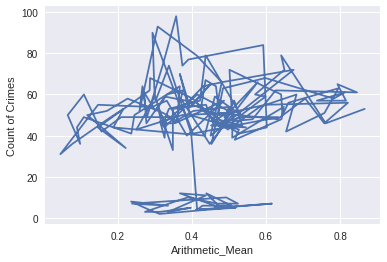

In [42]:
plt.plot(df_merged['arithmetic_mean'], df_merged['Count'])
plt.xlabel('Arithmetic_Mean')
plt.ylabel('Count of Crimes')

plt.show()

In [45]:
#Correlation=data.corr(method='pearson')
#sns.heatmap(df_merged['Count'],df_merged['arithmetic_mean'] ,cmap='Blues',cbar=False)
#plt.show()

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_merged[['year','arithmetic_mean']], df_merged['Count'].values, test_size=0.33, random_state=42)

In [100]:
y_train


array([ 6, 57, 57, 62, 58,  8, 56, 48, 68, 64, 57, 47, 54, 53, 60, 50, 55,
       59, 46, 65, 54, 77, 53, 75, 48, 53, 50, 62, 43, 55, 64, 52, 42, 63,
       72, 58, 50, 64, 50, 59, 41, 46,  5,  7, 48, 49, 49, 10, 44, 44, 55,
       70, 98, 79, 47,  4, 49, 58, 53, 39, 59,  3, 72,  7, 39, 46, 52, 44,
       56, 48, 79, 60, 47, 12,  3, 36, 62, 61, 49,  6, 44, 36, 57,  3, 74,
       57, 10, 55, 47, 40, 51,  7, 49, 54, 44, 50, 41,  4, 56, 48,  5,  6,
       46, 47, 63, 41, 74, 36, 53, 46, 49, 58, 36,  5, 60, 45, 44, 58, 42,
       31])

In [101]:
from sklearn.linear_model import LogisticRegression

Model_LR=LogisticRegression()
Model_LR.fit(X_train,y_train)
y_predict=Model_LR.predict(X_test)

In [29]:
#print('Accuracy :', accuracy_score(y_test,y_predict))

In [103]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix: ', confusion_matrix(y_test,y_predict))

('Confusion Matrix: ', array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))


In [104]:
#from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

#precision, recall, thresholds = precision_recall_curve(y_test, Model_LR.predict_proba(X_test)[:,1])

In [30]:
from sklearn.metrics import classification_report

#print(classification_report(y_test,y_predict))

In [31]:
#print('f1 :', f1_score(y_test,y_predict, average=None))

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [108]:
regressor = DecisionTreeRegressor(random_state=0)

In [109]:
#cross_val_score(regressor, y_predict, y_test, cv=10)